## Imports

In [107]:
import csv
import re
import glob
import datetime
from pathlib import Path
import pandas
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
from tkinter import simpledialog
print(matplotlib.matplotlib_fname())

C:\Users\andre\.matplotlib\matplotlibrc


## Save Fig?

In [108]:
SAVE_FIG = False
# "OneJump" , "StutterJump" , "TimeJump"
JUMP_TYPE = "StutterJump"

## Get the Data Location.

In [109]:
ROOT = tk.Tk()
ROOT.withdraw()
title = "File Location"
prompt = "Enter the path to the evaluation data: "
# Get path from user
path = simpledialog.askstring(title, prompt)
# If user closes program
if path is None:
    raise Exception("File path is does not exit or user closed program.")
    sys.exit()
# If user enters non-existant path
save_path = Path(path)
if not os.path.exists(save_path):
    raise Exception("File path is does not exit or user closed program.")
    sys.exit()
# Set the paths according to how they should be saved
data_path = save_path / "figures_data"
save_path = save_path / "figures"
# Make the save path if it does not exits
if not os.path.exists(save_path): os.makedirs(save_path)
# If the models path does not exist or is named wrong
if not os.path.exists(data_path):
    raise Exception("Plotting Data path does not exist or name of models file is not 'models'.")
    sys.exit()
# Print what the models path defined and the save path defined
print(f"\nThe data will be queued from:\n {data_path}\n")
print(f"The figures will be saved to:\n {save_path}")


The data will be queued from:
 00_Training_Data_Collected\Stutter_Jump\Best_Agents\figures_data

The figures will be saved to:
 00_Training_Data_Collected\Stutter_Jump\Best_Agents\figures


## Import the Data:

In [110]:
# sort the files read in
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

files = sorted(glob.glob(str(data_path / '*.csv')), key=numericalSort)

print(f'Number of Agents found: {len(files)}\n')

# organize the data into dictionaries
data = {}                                                                                   # dict to store agent data
file_names = []                                                                             # list to store file names for naming agents in dict
for f in files:
    file_name = os.path.basename(f)                                                         # get file name and split it up by
    file_name = re.split('[_ .]', file_name)
    # uncomment print statment to determine what numbers are needed in file_name
    print(file_name)
    file_name = file_name[1] + file_name[2]                                                 # choose the parts of file name you want to keep using the previous print statment
    file_names.append(file_name)                                                            # add the agents name to the list of file names
    df = pandas.read_csv(f)                                                                 # read in the first .csv file
    df_columns = list(df)                                                                   # get the list of data column names
    for column in df_columns:                                                               
        df_columns[df_columns.index(column)] = column.replace(' ', '').replace('#', '')     # get rid of spaces and #'s in the column names
    df.columns = df_columns                                                                 # set the .csv file column names to the cleaned up names
    data[file_name] = df.to_dict('series')                                                  # turn the .csv into a dict and place it in the data dict

    for column in data[file_name]:
            data[file_name][column] = data[file_name][column].to_numpy()                    # convert the columns in the agent dict in the data dict to numpy arrays
print(f'\nAgent Key Names: {list(data)}\n')                                                    # print out the agents names for using later in plotting
print(f"""\nAgent's Data Key Names: {list(data[next(iter(data))])}\n""")                       # print out the data column names for using later in plotting

deleted = 0
for agent in list(data):
    if np.max(data[agent]['RodPos']) <= 0.05:
        del data[agent]
        print(f'{agent} never gets off the ground, deleting it.')
        deleted = deleted + 1
print(f'\nNumber of agents deleted: {deleted}. Number of agents remaining: {len(list(data))}')
print(f'\nAgent Key Names: {list(data)}\n')                                                    # print out the agents names for using later in plotting

Number of Agents found: 2

['EpisodeData', 'EffStutterJump', '107', 'csv']
['EpisodeData', 'HeiStutterJump', '868', 'csv']

Agent Key Names: ['EffStutterJump107', 'HeiStutterJump868']


Agent's Data Key Names: ['Time', 'RodPos', 'RodVel', 'ActuatorPos', 'ActuatorVel', 'ActuatorAccel', 'Power', 'OmegaX', 'OmegaP', 'Reward']


Number of agents deleted: 0. Number of agents remaining: 2

Agent Key Names: ['EffStutterJump107', 'HeiStutterJump868']



## Best Agent

HeiStutterJump868 is the best Agent
HeiStutterJump868 earns 63.57


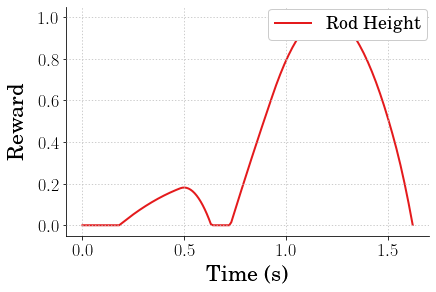

In [87]:
best_reward = 0.0
for agent in data:
    if np.sum(data[agent]["Reward"]) > best_reward:
        best_reward = np.sum(data[agent]["Reward"])
        best_agent = agent
print(f'{best_agent} is the best Agent')
print(f'{best_agent} earns {np.sum(data[best_agent]["Reward"]):.2f}')

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Reward', fontsize=22, weight='bold', labelpad=10)

plt.plot(data[best_agent]["Time"], data[best_agent]["Reward"], linewidth=2, linestyle='-', label='Rod Height')

# uncomment below and set limits if needed
# plt.xlim(0,1.25)
# plt.ylim(bottom=None, top=1.75)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'MostEfficientAgent_{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = save_path / filename
if SAVE_FIG is True:
    plt.savefig(path, transparent=True)
plt.show()

## Position vs Time

Heights Reached During Data 0: 0.94107634875992, -0.10267744624536272
Heights Reached During Data 1: 0.9068794551984887, -0.10232781511947786


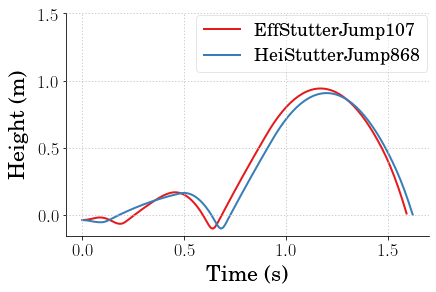

In [111]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Height (m)', fontsize=22, weight='bold', labelpad=10)

linestyle = ['-', '--', '-.', ':', ':']
for agent in data:
    plt.plot(data[agent]["Time"], data[agent]["RodPos"], linewidth=2, linestyle='-', label=agent)
    max_height_reached = np.max(data[agent]["RodPos"])
    min_height_reached = np.min(data[agent]["RodPos"])
    print(f"Heights Reached During Data {list(data.keys()).index(agent)}: {max_height_reached}, {min_height_reached}")

# uncomment below and set limits if needed
# plt.xlim(0,4)
plt.ylim(bottom=None, top=1.5)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True, framealpha=0.5)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'PositionVsTime_{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = save_path / filename
if SAVE_FIG is True:
    plt.savefig(path, transparent=True)
plt.show()

## Actuator Acceleration vs Time

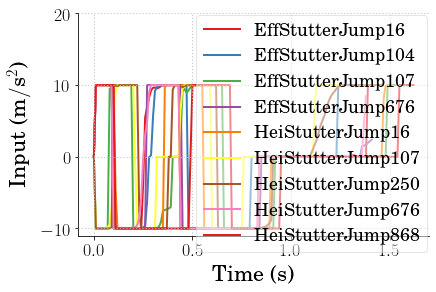

In [89]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Input ($\mbox{m} / \mbox{s}^{2}$)', fontsize=22, weight='bold', labelpad=10)

linestyle = ['-', '--', '-.', ':']
ii = 0
for agent in data:
    plt.plot(data[agent]["Time"], data[agent]["ActuatorAccel"], linewidth=2, linestyle='-', label=agent)
    ii += 1

# uncomment below and set limits if needed
# plt.xlim(-10,20)
plt.ylim(bottom=None, top=20)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True, framealpha=0.5)
ltext  = leg.get_texts()
plt.setp(ltext, fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'ActuatorPositionVsTime_{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = save_path / filename
SAVE_FIG = True
if SAVE_FIG is True:
    plt.savefig(path, transparent=True)
plt.show()

## Height vs Agent

[]
EffStutterJump16 height reached is: 0.7910059829964785
EffStutterJump104 height reached is: 0.7356367440700885
EffStutterJump107 height reached is: 0.94107634875992
EffStutterJump676 height reached is: 0.8116558396881615
HeiStutterJump16 height reached is: 0.8822925633372902
HeiStutterJump107 height reached is: 0.5375568050468702
HeiStutterJump250 height reached is: 0.9158491434668378
HeiStutterJump676 height reached is: 0.7676617282998355
HeiStutterJump868 height reached is: 0.9068794551984887


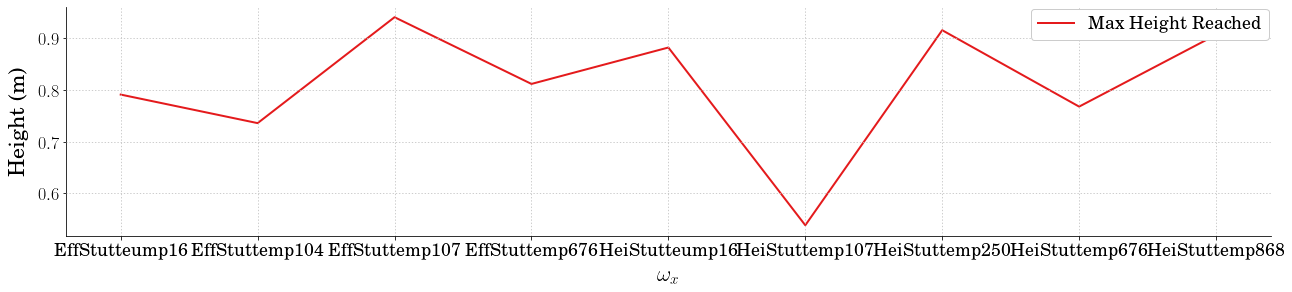

In [90]:
heights = []
agents = []
print(agents)
for agent in data:
    # min for spring compression, max for jump height
    height = np.max(data[agent]["RodPos"])
    heights.append(height) 
    print(f'{agent} height reached is: {height}')

    agents.append(f'{agent[0:9]}{agent[-5:]}')
    
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(18,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'\mbox{$\omega_x$}', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Height (m)', fontsize=22, weight='bold', labelpad=10)
 
plt.plot(agents, heights, linewidth=2, linestyle='-', label='Max Height Reached')
# plt.plot(agents, efficiencies(agents), "r--")

# uncomment below and set limits if needed
# plt.xlim(left=None, right=2)
# plt.ylim(bottom=None, top=.00225)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'MaxPositionVsAgent{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = save_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()

## Efficiency vs Agent

[]
EffStutterJump16 efficiency is: 0.001608519015350399
EffStutterJump104 efficiency is: 0.0015754872437128936
EffStutterJump107 efficiency is: 0.0019530814307674674
EffStutterJump676 efficiency is: 0.0015950699460833052
HeiStutterJump16 efficiency is: 0.0015338322462948152
HeiStutterJump107 efficiency is: 0.001715635372817626
HeiStutterJump250 efficiency is: 0.00136225860748136
HeiStutterJump676 efficiency is: 0.0015616306561790673
HeiStutterJump868 efficiency is: 0.0014374828066716881


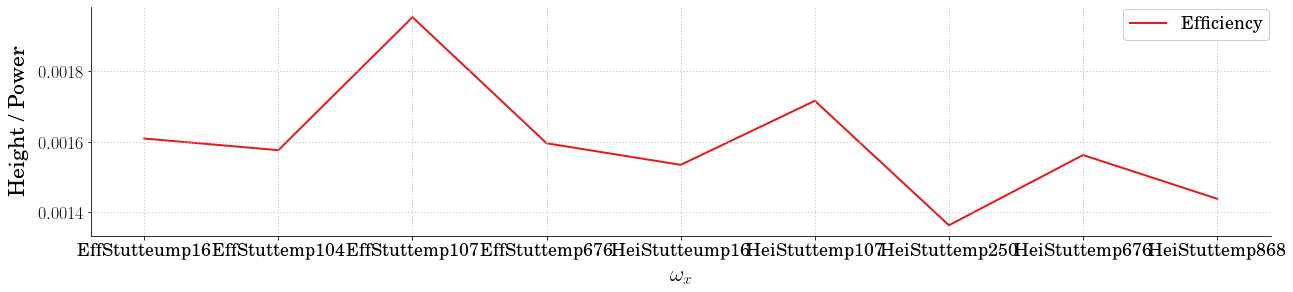

In [91]:
efficiencies = []
agents = []
print(agents)
for agent in data:
    efficiency = np.max(data[agent]["RodPos"]) / np.sum(data[agent]["Power"])
    efficiencies.append(efficiency) 
    print(f'{agent} efficiency is: {efficiency}')

    agents.append(f'{agent[0:9]}{agent[-5:]}')
    
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(18,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'\mbox{$\omega_x$}', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Height / Power', fontsize=22, weight='bold', labelpad=10)
 
plt.plot(agents, efficiencies, linewidth=2, linestyle='-', label='Efficiency')
# plt.plot(agents, efficiencies(agents), "r--")

# uncomment below and set limits if needed
# plt.xlim(left=None, right=2)
# plt.ylim(bottom=None, top=.00225)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'EfficiencyVsAgent_{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = save_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()

## Power vs Agent

[]


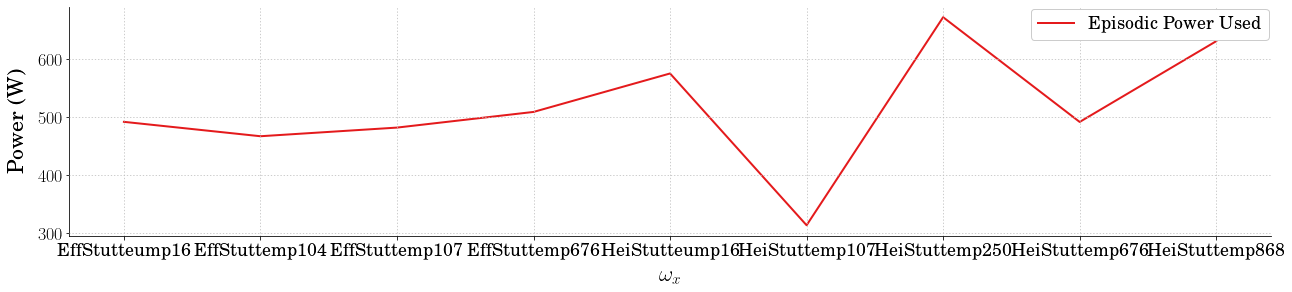

In [92]:
powers = []
agents = []
print(agents)
for agent in data:
    power = np.sum(data[agent]["Power"])
    powers.append(power) 
    # print(f'{agent} power used is: {power}')

    agents.append(f'{agent[0:9]}{agent[-5:]}')
    
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(18,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'\mbox{$\omega_x$}', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Power (W)', fontsize=22, weight='bold', labelpad=10)
 
plt.plot(agents, powers, linewidth=2, linestyle='-', label='Episodic Power Used')
# plt.plot(agents, efficiencies(agents), "r--")

# uncomment below and set limits if needed
# plt.xlim(left=None, right=2)
# plt.ylim(bottom=None, top=.00225)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'PowervsAgent_{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = save_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()

## Reward Vs Time

[0.81984373 0.80204794]


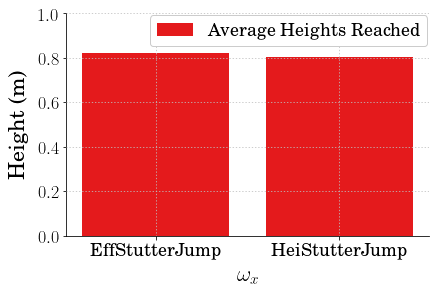

In [93]:
average_heights = np.zeros(2)
rewards = [f'Eff{JUMP_TYPE}', f'Hei{JUMP_TYPE}']
for ii in rewards:
    name = ii
    max_height = []
    for agent in data:
        if name in agent:
            max_height.append(max(data[agent]["RodPos"]))
    average_heights[rewards.index(ii)] = sum(max_height) / len(max_height)
print(average_heights)

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'\mbox{$\omega_x$}', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Height (m)', fontsize=22, weight='bold', labelpad=10)

plt.bar(rewards, average_heights, label='Average Heights Reached')
# plt.plot(rewards, average_heights, linewidth=2, linestyle='-', label='Average Height Reached')
# plt.plot(agents, efficiencies(agents), "r--")

# uncomment below and set limits if needed
# plt.xlim(left=None, right=2)
plt.ylim(bottom=None, top=1)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'AverageHeightvsAgent{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = save_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()

## Max Height vs Agent

[0.94107635 0.91584914]


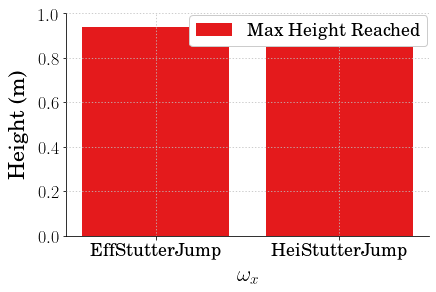

In [94]:
max_heights = np.zeros(2)
rewards = [f'Eff{JUMP_TYPE}', f'Hei{JUMP_TYPE}']
for ii in rewards:
    name = ii
    max_height = []
    for agent in data:
        if name in agent:
            max_height.append(max(data[agent]["RodPos"]))
    max_heights[rewards.index(ii)] = max(max_height)
print(max_heights)

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'\mbox{$\omega_x$}', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Height (m)', fontsize=22, weight='bold', labelpad=10)

plt.bar(rewards, max_heights, label='Max Height Reached')
# plt.plot(rewards, max_heights, linewidth=2, linestyle='-', label='Average Height Reached')
# plt.plot(agents, efficiencies(agents), "r--")

# uncomment below and set limits if needed
# plt.xlim(left=None, right=2)
plt.ylim(bottom=None, top=1)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'MaxHeightvsAgent{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = save_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()

## Average Power vs Agent

[487.34539411 536.66166743]


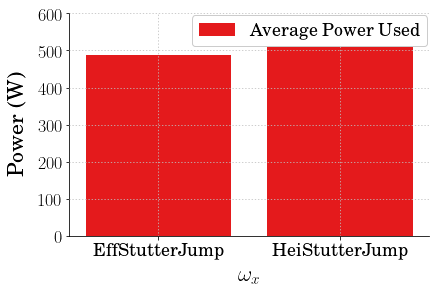

In [95]:
average_powers = np.zeros(2)
rewards = [f'Eff{JUMP_TYPE}', f'Hei{JUMP_TYPE}']
for ii in rewards:
    name = ii
    powers = []
    for agent in data:
        if name in agent:
            powers.append(sum(data[agent]["Power"]))
    average_powers[rewards.index(ii)] = sum(powers) / len(powers)
print(average_powers)

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'\mbox{$\omega_x$}', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Power (W)', fontsize=22, weight='bold', labelpad=10)

plt.bar(rewards, average_powers, label='Average Power Used')
# plt.plot(rewards, average_powers, linewidth=2, linestyle='-', label='Average Height Reached')
# plt.plot(agents, efficiencies(agents), "r--")

# uncomment below and set limits if needed
# plt.xlim(left=None, right=2)
plt.ylim(bottom=None, top=600)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'AveragePowervsAgent{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = save_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()

## Max Power Used vs Agent

[508.8528197  672.30196854]


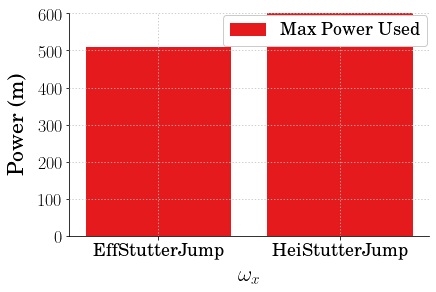

In [96]:
max_powers = np.zeros(2)
rewards = [f'Eff{JUMP_TYPE}', f'Hei{JUMP_TYPE}']
for ii in rewards:
    name = ii
    power = []
    for agent in data:
        if name in agent:
            power.append(sum(data[agent]["Power"]))
    max_powers[rewards.index(ii)] = max(power)
print(max_powers)

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'\mbox{$\omega_x$}', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Power (m)', fontsize=22, weight='bold', labelpad=10)

plt.bar(rewards, max_powers, label='Max Power Used')
# plt.plot(rewards, max_powers, linewidth=2, linestyle='-', label='Average Height Reached')
# plt.plot(agents, efficiencies(agents), "r--")

# uncomment below and set limits if needed
# plt.xlim(left=None, right=2)
plt.ylim(bottom=None, top=600)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'MaxHeightvsAgent{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = save_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()

## Average Efficiency vs Agent

[0.00168304 0.00152217]


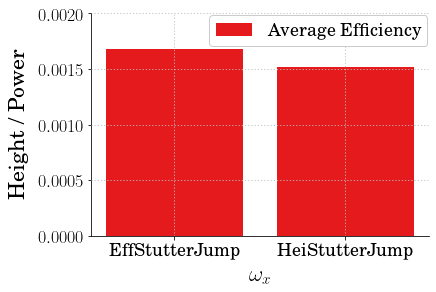

In [97]:
average_efficiencies = np.zeros(2)
rewards = [f'Eff{JUMP_TYPE}', f'Hei{JUMP_TYPE}']
for ii in rewards:
    name = ii
    average_efficiency = []
    for agent in data:
        if name in agent:
            average_efficiency.append(max(data[agent]["RodPos"]) / sum(data[agent]["Power"]))
    average_efficiencies[rewards.index(ii)] = sum(average_efficiency) / len(average_efficiency)
print(average_efficiencies)

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'\mbox{$\omega_x$}', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Height / Power', fontsize=22, weight='bold', labelpad=10)

plt.bar(rewards, average_efficiencies, label='Average Efficiency')
# plt.plot(rewards, average_efficiencies, linewidth=2, linestyle='-', label='Average Height Reached')
# plt.plot(agents, efficiencies(agents), "r--")

# uncomment below and set limits if needed
# plt.xlim(left=None, right=2)
plt.ylim(bottom=None, top=0.002)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'AverageHeightvsAgent{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = save_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()

## Max Efficiencies vs Agent

[0.00195308 0.00171564]


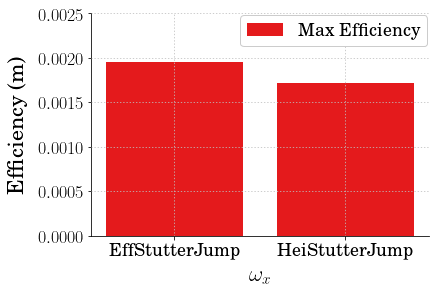

In [98]:
max_efficiencies = np.zeros(2)
rewards = [f'Eff{JUMP_TYPE}', f'Hei{JUMP_TYPE}']
for ii in rewards:
    name = ii
    efficiency = []
    for agent in data:
        if name in agent:
            efficiency.append(max(data[agent]["RodPos"]) / sum(data[agent]["Power"]))
    max_efficiencies[rewards.index(ii)] = max(efficiency)
print(max_efficiencies)

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'\mbox{$\omega_x$}', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Efficiency (m)', fontsize=22, weight='bold', labelpad=10)

plt.bar(rewards, max_efficiencies, label='Max Efficiency')
# plt.plot(rewards, max_efficiencies, linewidth=2, linestyle='-', label='Average Height Reached')
# plt.plot(agents, efficiencies(agents), "r--")

# uncomment below and set limits if needed
# plt.xlim(left=None, right=2)
plt.ylim(bottom=None, top=0.0025)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'AverageHeightvsAgent{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = save_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()

## Compare Heights

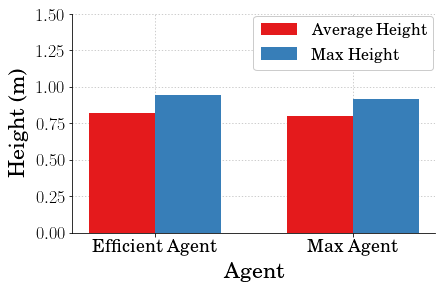

Average Percent Difference: 2.2187937830044784
 Max Percent Difference: 2.7545153558355278


In [99]:
# Plot the data
# Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.2,left=0.12,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Agent', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Height (m)', family='serif', fontsize=22, weight='bold', labelpad=8)

plt.bar([1, 1.75], average_heights, width=0.25, align='center', label="Average Height")
plt.bar([1.25, 2], max_heights, width=0.25, align='center', label="Max Height")

plt.xticks([1.125, 1.875], ['Efficient Agent', 'Max Agent'])

# Uncomment below to rotate the labels to be vertical, if needed
# plt.setp(ax.get_xmajorticklabels(), rotation=90)

# uncomment below and set limits if needed
# plt.xlim(left=None, right=2)
plt.ylim(bottom=None, top=1.5)

# Uncomment below to add a legend if necessary
leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts() 
plt.setp(ltext,family='serif',fontsize=16)

# save the figure as a high-res pdf in the current folder
filename = f'CompareHeight_{JUMP_TYPE}.png'
path = save_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()


# show the figure
plt.show()

average_percent = (average_heights[0] - average_heights[1]) / average_heights[1] * 100
max_percent = (max_heights[0] - max_heights[1]) / max_heights[1] * 100
print(f'Average Percent Difference: {average_percent}\n Max Percent Difference: {max_percent}')

## Compare Power Used

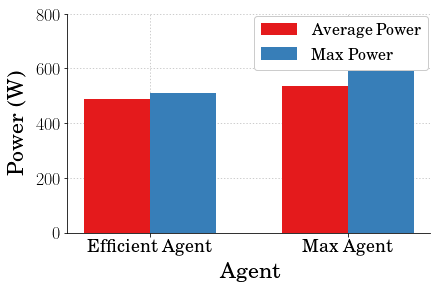

Average Percent Difference: -9.189453301804866
 Max Percent Difference: -24.31186527535273


In [100]:
# Plot the data
# Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.2,left=0.12,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Agent', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Power (W)', family='serif', fontsize=22, weight='bold', labelpad=8)

plt.bar([1, 1.75], average_powers, width=0.25, align='center', label="Average Power")
plt.bar([1.25, 2], max_powers, width=0.25, align='center', label="Max Power")

plt.xticks([1.125, 1.875], ['Efficient Agent', 'Max Agent'])

# Uncomment below to rotate the labels to be vertical, if needed
# plt.setp(ax.get_xmajorticklabels(), rotation=90)

# uncomment below and set limits if needed
# plt.xlim(left=None, right=2)
plt.ylim(bottom=None, top=800)

# Uncomment below to add a legend if necessary
leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts() 
plt.setp(ltext,family='serif',fontsize=16)

# save the figure as a high-res pdf in the current folder
filename = f'ComparePower_{JUMP_TYPE}.png'
path = save_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()


# show the figure
plt.show()

average_percent = (average_powers[0] - average_powers[1]) / average_powers[1] * 100
max_percent = (max_powers[0] - max_powers[1]) / max_powers[1] * 100
print(f'Average Percent Difference: {average_percent}\n Max Percent Difference: {max_percent}')

## Compare Efficiency

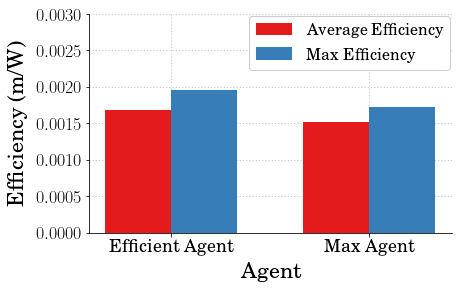

Average Percent Difference: 10.568575719228251
 Max Percent Difference: 13.840123706465551


In [101]:
# Plot the data
# Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.2,left=0.12,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Agent', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Efficiency (m/W)', family='serif', fontsize=22, weight='bold', labelpad=8)

plt.bar([1, 1.75], average_efficiencies, width=0.25, align='center', label="Average Efficiency")
plt.bar([1.25, 2], max_efficiencies, width=0.25, align='center', label="Max Efficiency")

plt.xticks([1.125, 1.875], ['Efficient Agent', 'Max Agent'])

# Uncomment below to rotate the labels to be vertical, if needed
# plt.setp(ax.get_xmajorticklabels(), rotation=90)

# uncomment below and set limits if needed
# plt.xlim(left=None, right=2)
plt.ylim(bottom=None, top=0.003)

# Uncomment below to add a legend if necessary
leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts() 
plt.setp(ltext,family='serif',fontsize=16)

# save the figure as a high-res pdf in the current folder
filename = f'CompareEfficiency_{JUMP_TYPE}.png'
path = save_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()


# show the figure
plt.show()

average_percent = (average_efficiencies[0] - average_efficiencies[1]) / average_efficiencies[1] * 100
max_percent = (max_efficiencies[0] - max_efficiencies[1]) / max_efficiencies[1] * 100
print(f'Average Percent Difference: {average_percent}\n Max Percent Difference: {max_percent}')

## Height vs Efficiency

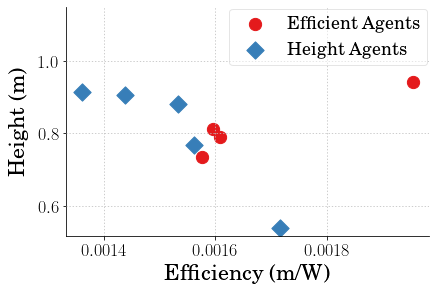

In [106]:
efficiencies_eff_agents = []
efficiencies_hei_agents = []
heights_eff_agents = []
heights_hei_agents = []

ii = 0
for agent in data:
    if "Eff" in agent:
        efficiencies_eff_agents.append(efficiencies[ii])
        heights_eff_agents.append(heights[ii])
    elif "Hei" in agent:
        efficiencies_hei_agents.append(efficiencies[ii])
        heights_hei_agents.append(heights[ii])
    ii += 1

fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'Efficiency (m/W)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Height (m)', fontsize=22, weight='bold', labelpad=10)

plt.scatter(efficiencies_eff_agents, heights_eff_agents, s=150, marker="o", label="Efficient Agents")
plt.scatter(efficiencies_hei_agents, heights_hei_agents, s=150, marker="D", label="Height Agents")

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True, framealpha=0.5)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# plt.xlim(0.0004, 0.0015)
plt.ylim(bottom=None, top=1.15)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = f'HeightVsEfficiency_{JUMP_TYPE}.png'
path = save_path / filename
SAVE_FIG = True
if SAVE_FIG is True:
    plt.savefig(path, transparent=True)
plt.show()